In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import os

In [2]:
#Train set
Normal_train = os.listdir('/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL')
Pneumonia_train = os.listdir('/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA')

#Validation set
Normal_val = os.listdir('/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/NORMAL')
Pneumonia_val = os.listdir('/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA')

print(Normal_train[:3])
print(Pneumonia_train[:3])
print(Normal_val[:3])
print(Pneumonia_val[:3])

['NORMAL2-IM-1232-0001.jpeg', 'NORMAL2-IM-0588-0001.jpeg', 'NORMAL2-IM-0667-0001.jpeg']
['person63_bacteria_306.jpeg', 'person414_virus_845.jpeg', 'person419_virus_857.jpeg']
['NORMAL2-IM-1427-0001.jpeg', 'NORMAL2-IM-1442-0001.jpeg', 'NORMAL2-IM-1431-0001.jpeg']
['person1952_bacteria_4883.jpeg', 'person1951_bacteria_4882.jpeg', 'person1954_bacteria_4886.jpeg']


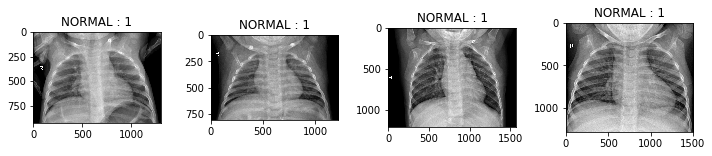

In [3]:
## Visualization for Normal Patients
plt.figure(figsize = (10,10))
for i in range(4):
    plt.subplot(1, 4 , i+1)
    img = cv2.imread('/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL' + "/" + Normal_train[i])
    plt.imshow(img)
    plt.title('NORMAL : 1')
    plt.tight_layout()
plt.show()

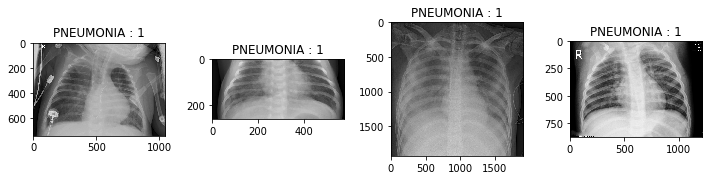

In [4]:
## Visualization for PNEUMONIA Patients
plt.figure(figsize = (10,10))
for i in range(4):
    plt.subplot(1, 4 , i+1)
    img = cv2.imread('/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA' + "/" + Pneumonia_train[i])
    plt.imshow(img)
    plt.title('PNEUMONIA : 1')
    plt.tight_layout()
plt.show()

In [5]:
# Read and preprocess images
image_arr_train =[]
labels_train = []

for img in Normal_train:
    try:
        image = cv2.imread('/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/' + img)
        image_from_array = Image.fromarray(image, 'RGB')  #Read in the image with PIL image function in colour mode.
        resize_img = image_from_array.resize((150, 150))  #Resize the image to 60 * 60
        image_arr_train.append(np.array(resize_img))
        labels_train.append(0)
        
    except AttributeError:
        print("An error occured while reading in the image")

for img in Pneumonia_train:
    try:
        image=cv2.imread('/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/' + img)
        image_from_array = Image.fromarray(image, 'RGB')
        resize_img = image_from_array.resize((150, 150))
        image_arr_train.append(np.array(resize_img))
        labels_train.append(1)
        
    except AttributeError:
        print("An error occur while reading the image")

An error occured while reading in the image
An error occur while reading the image


In [6]:
# Read and preprocess images
image_arr_val =[]
labels_val = []

for img in Normal_val:
    try:
        image = cv2.imread('/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/NORMAL/' + img)
        image_from_array = Image.fromarray(image, 'RGB')  #Read in the image with PIL image function in colour mode.
        resize_img = image_from_array.resize((150, 150))  #Resize the image to 60 * 60
        image_arr_val.append(np.array(resize_img))
        labels_val.append(0)
        
    except AttributeError:
        print("An error occured while reading in the image")

for img in Pneumonia_val:
    try:
        image=cv2.imread('/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/' + img)
        image_from_array = Image.fromarray(image, 'RGB')
        resize_img = image_from_array.resize((150, 150))
        image_arr_val.append(np.array(resize_img))
        labels_val.append(1)
        
    except AttributeError:
        print("An error occur while reading the image")

An error occured while reading in the image
An error occur while reading the image


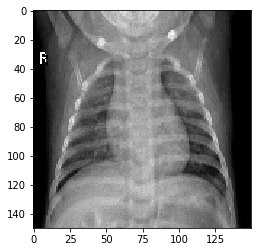

In [7]:
plt.imshow(image_arr_train[1])
plt.show()

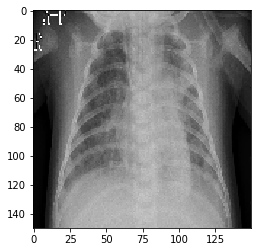

In [8]:
plt.imshow(image_arr_val[-1])
plt.show()

In [9]:
#shuffle images by getting the rows and using np.random for shuffle

#Train
train_data = np.array(image_arr_train)
train_labels = np.array(labels_train)
idx = np.arange(train_data.shape[0])
np.random.shuffle(idx)
train_data = train_data[idx]
train_labels = train_labels[idx]

#Validation
val_data = np.array(image_arr_val)
val_labels = np.array(labels_val)
idx = np.arange(val_data.shape[0])
np.random.shuffle(idx)
val_data = val_data[idx]
val_labels = val_labels[idx]

In [10]:
print("Length of train set {}".format(train_data.shape))
print("Length of val set {}".format(val_data.shape))

Length of train set (5216, 150, 150, 3)
Length of val set (16, 150, 150, 3)


In [11]:
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import MaxPool2D
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import BatchNormalization
from keras.layers import Dropout
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img

Xtrain, Xval, ytrain, yval = train_test_split(train_data, train_labels, test_size=0.01)

batch_size = 24
ntrain = len(train_data)
nval = len(val_data)

Using TensorFlow backend.


In [12]:
print(f'Shape of training image : {Xtrain.shape}')
print(f'Shape of validation image : {Xval.shape}')
print(f'Shape of training labels : {ytrain.shape}')
print(f'Shape of validation labels : {yval.shape}')

Shape of training image : (5163, 150, 150, 3)
Shape of validation image : (53, 150, 150, 3)
Shape of training labels : (5163,)
Shape of validation labels : (53,)


In [13]:
#Create data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow(train_data, train_labels, batch_size=batch_size, shuffle=False)
val_generator = train_datagen.flow(val_data, val_labels, batch_size=8, shuffle=False)

In [14]:
#let's build the CNN model
from keras import optimizers
cnn = Sequential()


cnn.add(Conv2D(512, (3, 3), activation="relu", padding = 'same',input_shape=(150, 150, 3)))
cnn.add(MaxPool2D(pool_size = (2, 2)))
cnn.add(Conv2D(254, (3, 3), activation="relu", padding = 'same'))
cnn.add(MaxPool2D(pool_size = (2, 2)))
cnn.add(Conv2D(128, (3, 3), activation="relu", padding = 'same'))
cnn.add(MaxPool2D(pool_size = (2, 2)))
cnn.add(Conv2D(64, (3, 3), activation="relu", padding = 'same'))
cnn.add(MaxPool2D(pool_size = (2, 2)))
cnn.add(Conv2D(32, (3, 3), activation="relu", padding = 'same'))
cnn.add(MaxPool2D(pool_size = (2, 2)))
cnn.add(Dropout(0.2))
cnn.add(Flatten())
# Fully Connected Layers
cnn.add(Dense(activation = 'relu', units = 512))
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'sigmoid', units = 1))


# Compile the Neural network
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
cnn.compile(optimizer = sgd,loss = 'binary_crossentropy', metrics = ['accuracy'])

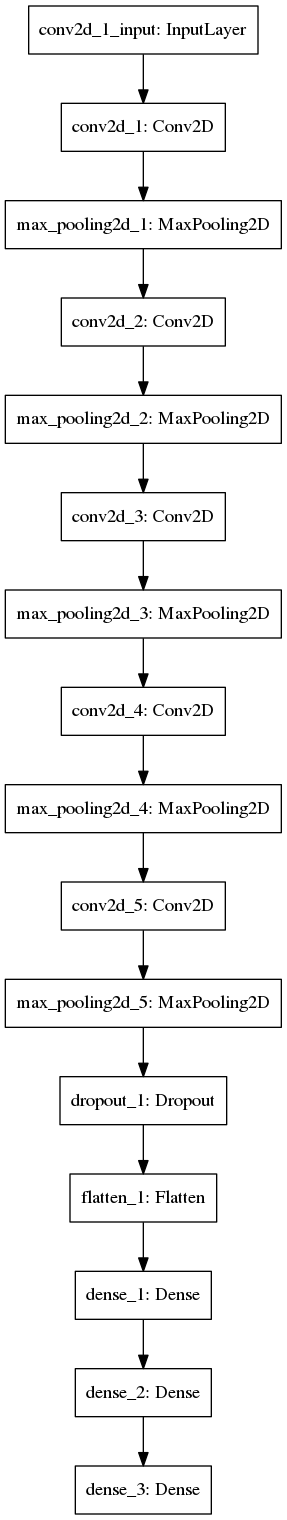

In [15]:
 #Plot model
from keras.utils import plot_model
plot_model(cnn, to_file='model.png')

In [16]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 512)     14336     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 512)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 254)       1170686   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 254)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 128)       292736    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 64)       

In [17]:
cnn.fit_generator(train_generator,steps_per_epoch=ntrain//batch_size,epochs=40,
                             validation_data=val_generator, validation_steps=nval//batch_size)

Epoch 1/40
217/217 [==============================] - 26s 122ms/step - loss: 0.5427 - accuracy: 0.7554 - val_loss: 0.9112 - val_accuracy: 0.5625
Epoch 2/40
217/217 [==============================] - 24s 108ms/step - loss: 0.2133 - accuracy: 0.9189 - val_loss: 0.2836 - val_accuracy: 0.7500
Epoch 3/40
217/217 [==============================] - 24s 108ms/step - loss: 0.1605 - accuracy: 0.9422 - val_loss: 0.8869 - val_accuracy: 0.6250
Epoch 4/40
217/217 [==============================] - 23s 108ms/step - loss: 0.1263 - accuracy: 0.9547 - val_loss: 0.7391 - val_accuracy: 0.6875
Epoch 5/40
217/217 [==============================] - 24s 108ms/step - loss: 0.1088 - accuracy: 0.9592 - val_loss: 0.6245 - val_accuracy: 0.7500
Epoch 6/40
217/217 [==============================] - 24s 108ms/step - loss: 0.0935 - accuracy: 0.9651 - val_loss: 0.5355 - val_accuracy: 0.5625
Epoch 7/40
217/217 [==============================] - 24s 109ms/step - loss: 0.0860 - accuracy: 0.9671 - val_loss: 0.1805 - val_ac

LOAD AND USED OUR SAVED MODEL

In [18]:
# #load model and make predictions
# from keras.models import load_model
# cnn = load_model('../input/pneumonnia-prediction-dsn/pneumonia_model_best.h5')

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


# predict probabilities for test set
yhat_probs = cnn.predict(Xval, verbose=0)
# predict crisp classes for test set
yhat_classes = cnn.predict_classes(Xval, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(yval, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(yval, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(yval, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(yval, yhat_classes)
print('F1 score: %f' % f1)

# confusion matrix
matrix = confusion_matrix(yval, yhat_classes)
print(matrix)

#classiication report
cp = classification_report(yval, yhat_classes)
print(cp)

Accuracy: 0.943396
Precision: 0.931818
Recall: 1.000000
F1 score: 0.964706
[[ 9  3]
 [ 0 41]]
              precision    recall  f1-score   support

           0       1.00      0.75      0.86        12
           1       0.93      1.00      0.96        41

    accuracy                           0.94        53
   macro avg       0.97      0.88      0.91        53
weighted avg       0.95      0.94      0.94        53



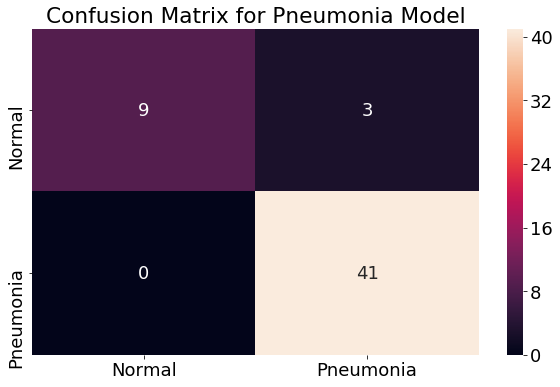

In [20]:
import seaborn as sb
import pandas as pd

columns = ['Normal','Pneumonia']  

cp_df = pd.DataFrame(matrix,columns,columns)                      
plt.figure(figsize=(10,6))  
plt.rcParams.update({'font.size': 18})
plt.title("Confusion Matrix for Pneumonia Model")
sb.heatmap(cp_df, annot=True)


In [21]:
print(cnn.history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


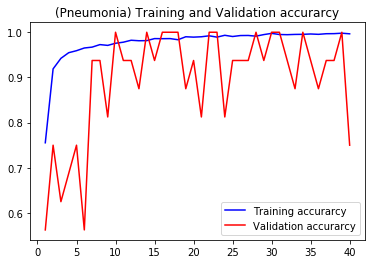

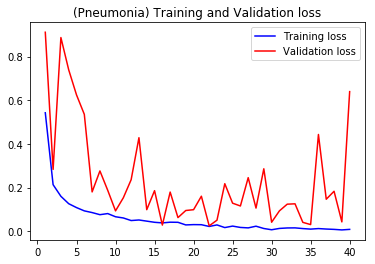

In [22]:
history = cnn.history.history
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

epochs = range(1, len(acc) +1)
plt.rcParams.update({'font.size': 10})

plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('(Pneumonia) Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('(Pneumonia) Training and Validation loss')
plt.legend()

plt.show()

In [23]:
from keras.models import load_model
cnn.save('pneumonia_model.h5')
# cnn.save_weights('pneumonia_model_wieghts.h5')